In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Importing the Datasets

### 5-year Government Yield (Bloomberg)

In [2]:
df_Govt_Yield_1Y = pd.read_excel("1Y/Government-Yields_Data_1Y.xlsx")

In [3]:
actual_colnames_Govt_Yield_1Y = {'C0821Y Index  (R4)':'USD',
                                 'C9101Y Index  (R3)':'EUR',
                                 'C1101Y Index  (L3)':'GBP',
                                 'C2561Y Index  (L1)':'CHF',
                                 'C1051Y Index  (R1)':'JPY',
                                 'C1271Y Index  (R1)':'AUD',
                                 'C1011Y Index  (L2)':'CAD',
                                 'C2501Y Index  (R1)':'NZD',
                                 'C2591Y Index  (R2)':'SEK',
                                 'C2661Y Index  (R1)':'NOK',
                                 'C2671Y Index  (L4)':'DKK'
                  }

df_Govt_Yield_1Y.rename(columns=actual_colnames_Govt_Yield_1Y, inplace=True)
df_Govt_Yield_1Y

,Date,USD,EUR,GBP,CHF,JPY,AUD,CAD,NZD,NOK,SEK,DKK
0,2000-01-03,6.2300,3.8200,NaN,NaN,NaN,NaN,NaN,NaN,5.8500,4.3800,4.3200
1,2000-01-04,6.1400,3.8600,6.4100,2.0800,0.1500,6.1200,5.8200,NaN,5.8800,4.4100,4.3100
2,2000-01-05,6.2200,3.8700,6.4300,2.0800,0.1400,6.0900,5.8300,6.0500,5.8500,4.4000,4.3000
3,2000-01-06,6.1800,3.8600,6.4300,2.1100,0.1300,6.1100,5.7400,6.1200,5.8600,NaN,4.2800
4,2000-01-07,6.2300,3.8200,6.4100,2.0900,0.1400,6.1200,5.7800,6.1600,5.8600,4.4300,4.2400
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,1.7324,-0.4981,1.1122,-0.5707,-0.0818,1.1252,1.8172,2.4515,1.8083,0.2378,-0.2827
5807,2022-04-06,1.7562,-0.5337,1.1185,-0.5767,-0.0806,1.2888,1.8176,2.5731,1.8472,0.2749,-0.2802
5808,2022-04-07,1.7337,-0.4899,1.1126,-0.5542,-0.0871,1.2942,1.8265,2.5155,1.8491,0.2972,-0.2609
5809,2022-04-08,1.7773,-0.4760,1.1142,-0.5436,-0.1116,1.3155,1.8990,2.5511,1.8431,0.3186,-0.2176


In [4]:
df_Govt_Yield_1Y = df_Govt_Yield_1Y.bfill(axis=0).ffill(axis=0)
df_Govt_Yield_1Y

,Date,USD,EUR,GBP,CHF,JPY,AUD,CAD,NZD,NOK,SEK,DKK
0,2000-01-03,6.2300,3.8200,6.4100,2.0800,0.1500,6.1200,5.8200,6.0500,5.8500,4.3800,4.3200
1,2000-01-04,6.1400,3.8600,6.4100,2.0800,0.1500,6.1200,5.8200,6.0500,5.8800,4.4100,4.3100
2,2000-01-05,6.2200,3.8700,6.4300,2.0800,0.1400,6.0900,5.8300,6.0500,5.8500,4.4000,4.3000
3,2000-01-06,6.1800,3.8600,6.4300,2.1100,0.1300,6.1100,5.7400,6.1200,5.8600,4.4300,4.2800
4,2000-01-07,6.2300,3.8200,6.4100,2.0900,0.1400,6.1200,5.7800,6.1600,5.8600,4.4300,4.2400
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,1.7324,-0.4981,1.1122,-0.5707,-0.0818,1.1252,1.8172,2.4515,1.8083,0.2378,-0.2827
5807,2022-04-06,1.7562,-0.5337,1.1185,-0.5767,-0.0806,1.2888,1.8176,2.5731,1.8472,0.2749,-0.2802
5808,2022-04-07,1.7337,-0.4899,1.1126,-0.5542,-0.0871,1.2942,1.8265,2.5155,1.8491,0.2972,-0.2609
5809,2022-04-08,1.7773,-0.4760,1.1142,-0.5436,-0.1116,1.3155,1.8990,2.5511,1.8431,0.3186,-0.2176


### Interest Rate Swaps (Bloomberg)

In [5]:
df_Int_Rate_Swap_1Y = pd.read_excel("1Y/IRS_Data_1Y.xlsx")

In [6]:
actual_colnames_Int_Rate_Swap_1Y = {'USSW1 Curncy  (R1)':'IRS_USD',
                                    'EUSW1V3 Curncy  (L4)':'IRS_EUR_V3',
                                    'EUSA1 Curncy  (R4)':'IRS_EUR',
                                    'BPSW1V3 Curncy  (R2)':'IRS_GBP_V3',
                                    'BPSW1 Curncy  (L2)':'IRS_GBP',
                                    'SFSW1V3 Curncy  (R3)':'IRS_CHF_V3',
                                    'SFSW1 Curncy  (L1)':'IRS_CHF',
                                    'JYSW1 Curncy  (R1)':'IRS_JPY',
                                    'JYBC1 Curncy  (R1)':'IRS_JPY_BC',
                                    'ADSWAP1 Curncy  (R1)':'IRS_AUD',
                                    'CDSW1 Curncy  (L3)':'IRS_CAD',
                                    'NDSWAP1 Curncy  (R1)':'IRS_NZD',
                                    'NKSW1 Curncy  (R1)':'IRS_NOK',
                                    'NKBFVC1 Curncy  (R1)':'IRS_NOK_BFVC',
                                    'SKSW1 Curncy  (R1)':'IRS_SEK',
                                    'DKSW1 Curncy  (R1)':'IRS_DKK'
                                   }

df_Int_Rate_Swap_1Y.rename(columns=actual_colnames_Int_Rate_Swap_1Y, inplace=True)
df_Int_Rate_Swap_1Y

,Date,IRS_USD,IRS_EUR_V3,IRS_EUR,IRS_GBP_V3,IRS_GBP,IRS_CHF_V3,IRS_CHF,IRS_JPY,IRS_JPY_BC,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_NOK_BFVC,IRS_SEK,IRS_DKK
0,2000-01-03,6.5200,NaN,4.0150,NaN,NaN,NaN,NaN,NaN,NaN,6.360,NaN,NaN,5.9626,NaN,4.6550,4.4550
1,2000-01-04,6.6200,NaN,4.0375,NaN,NaN,NaN,NaN,NaN,NaN,6.400,NaN,6.4900,5.9583,NaN,4.6050,4.4350
2,2000-01-05,6.6200,NaN,4.0425,NaN,NaN,NaN,NaN,NaN,NaN,6.380,NaN,6.5550,5.9242,NaN,4.5950,4.4050
3,2000-01-06,6.5900,NaN,4.0375,NaN,NaN,NaN,NaN,NaN,NaN,6.360,NaN,6.5900,5.9428,NaN,4.6450,4.3950
4,2000-01-07,6.5900,NaN,3.9975,NaN,NaN,NaN,NaN,NaN,NaN,6.385,NaN,6.5750,5.9471,NaN,4.5650,4.3450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.0739,-0.0840,-0.0578,NaN,NaN,NaN,NaN,NaN,NaN,1.591,2.297,2.8958,1.9575,14.0,0.6825,0.2353
5807,2022-04-06,2.0749,-0.0890,-0.0575,NaN,NaN,NaN,NaN,NaN,NaN,1.655,2.275,2.9200,1.9652,12.8,0.7185,0.2386
5808,2022-04-07,2.0814,-0.0670,-0.0412,NaN,NaN,NaN,NaN,NaN,NaN,1.629,2.338,2.9681,1.9459,10.9,0.7229,0.2623
5809,2022-04-08,2.1173,-0.0192,0.0030,NaN,NaN,NaN,NaN,NaN,NaN,1.636,2.388,2.9748,1.9350,10.2,0.7395,0.2864


In [7]:
df_Int_Rate_Swap_1Y['IRS_EUR'] = df_Int_Rate_Swap_1Y[['IRS_EUR_V3','IRS_EUR']].mean(axis=1)
df_Int_Rate_Swap_1Y['IRS_GBP'] = df_Int_Rate_Swap_1Y[['IRS_GBP_V3','IRS_GBP']].mean(axis=1)
df_Int_Rate_Swap_1Y['IRS_CHF'] = df_Int_Rate_Swap_1Y[['IRS_CHF_V3','IRS_CHF']].mean(axis=1)
# df_Int_Rate_Swap_1Y['IRS_JPY'] = df_Int_Rate_Swap_1Y[['IRS_JPY_BC','IRS_JPY']].mean(axis=1)
# df_Int_Rate_Swap_1Y['IRS_NOK'] = df_Int_Rate_Swap_1Y[['IRS_NOK_BFVC','IRS_NOK']].mean(axis=1)

df_Int_Rate_Swap_1Y.drop(['IRS_EUR_V3','IRS_GBP_V3','IRS_CHF_V3','IRS_JPY_BC','IRS_NOK_BFVC'], axis=1, inplace=True)
df_Int_Rate_Swap_1Y

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_SEK,IRS_DKK
0,2000-01-03,6.5200,4.01500,NaN,NaN,NaN,6.360,NaN,NaN,5.9626,4.6550,4.4550
1,2000-01-04,6.6200,4.03750,NaN,NaN,NaN,6.400,NaN,6.4900,5.9583,4.6050,4.4350
2,2000-01-05,6.6200,4.04250,NaN,NaN,NaN,6.380,NaN,6.5550,5.9242,4.5950,4.4050
3,2000-01-06,6.5900,4.03750,NaN,NaN,NaN,6.360,NaN,6.5900,5.9428,4.6450,4.3950
4,2000-01-07,6.5900,3.99750,NaN,NaN,NaN,6.385,NaN,6.5750,5.9471,4.5650,4.3450
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.0739,-0.07090,NaN,NaN,NaN,1.591,2.297,2.8958,1.9575,0.6825,0.2353
5807,2022-04-06,2.0749,-0.07325,NaN,NaN,NaN,1.655,2.275,2.9200,1.9652,0.7185,0.2386
5808,2022-04-07,2.0814,-0.05410,NaN,NaN,NaN,1.629,2.338,2.9681,1.9459,0.7229,0.2623
5809,2022-04-08,2.1173,-0.00810,NaN,NaN,NaN,1.636,2.388,2.9748,1.9350,0.7395,0.2864


In [8]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_Int_Rate_Swap_1Y = df_Int_Rate_Swap_1Y.bfill(axis='rows').ffill(axis='rows')
df_Int_Rate_Swap_1Y

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,IRS_SEK,IRS_DKK
0,2000-01-03,6.5200,4.01500,0.82540,0.37500,0.4460,6.360,5.035,6.4900,5.9626,4.6550,4.4550
1,2000-01-04,6.6200,4.03750,0.82540,0.37500,0.4460,6.400,5.035,6.4900,5.9583,4.6050,4.4350
2,2000-01-05,6.6200,4.04250,0.82540,0.37500,0.4460,6.380,5.035,6.5550,5.9242,4.5950,4.4050
3,2000-01-06,6.5900,4.03750,0.82540,0.37500,0.4460,6.360,5.035,6.5900,5.9428,4.6450,4.3950
4,2000-01-07,6.5900,3.99750,0.82540,0.37500,0.4460,6.385,5.035,6.5750,5.9471,4.5650,4.3450
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.0739,-0.07090,0.85475,-0.66275,0.0213,1.591,2.297,2.8958,1.9575,0.6825,0.2353
5807,2022-04-06,2.0749,-0.07325,0.85475,-0.66275,0.0213,1.655,2.275,2.9200,1.9652,0.7185,0.2386
5808,2022-04-07,2.0814,-0.05410,0.85475,-0.66275,0.0213,1.629,2.338,2.9681,1.9459,0.7229,0.2623
5809,2022-04-08,2.1173,-0.00810,0.85475,-0.66275,0.0213,1.636,2.388,2.9748,1.9350,0.7395,0.2864


### Basis Swaps (Bloomberg)

In [9]:
df_Basis_Swaps_1Y = pd.read_excel("1Y/Basis-Swaps_Data_1Y.xlsx")

In [10]:
actual_colnames_Basis_Swaps_1Y = {'EUBS1 Curncy  (L4)':'BS_EUR',
                                  'BPBS1 Curncy  (R1)':'BS_GBP',
                                  'SFBS1 Curncy  (L3)':'BS_CHF',
                                  'JYBS1 Curncy  (R2)':'BS_JPY',
                                  'ADBS1 Curncy  (L2)':'BS_AUD',
                                  'CDBS1 Curncy  (R3)':'BS_CAD',
                                  'NDBS1 Curncy  (L1)':'BS_NZD',
                                  'NKBS1 Curncy  (R1)':'BS_NOK',
                                  'SKBS1 Curncy  (R1)':'BS_SEK',
                                  'DKBS1 Curncy  (R4)':'BS_DKK'
                                 }

df_Basis_Swaps_1Y.rename(columns=actual_colnames_Basis_Swaps_1Y, inplace=True)
df_Basis_Swaps_1Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,NaN,NaN,NaN,NaN,7.500,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,NaN,NaN,NaN,NaN,7.500,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,NaN,NaN,NaN,NaN,7.500,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,NaN,NaN,NaN,NaN,7.500,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,NaN,NaN,NaN,NaN,7.500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5799,2022-04-05,NaN,NaN,NaN,NaN,14.500,-19.750,-5.000,-11.815,-16.50,NaN
5800,2022-04-06,NaN,NaN,NaN,NaN,22.625,-19.125,-4.282,-10.750,-16.00,NaN
5801,2022-04-07,NaN,NaN,NaN,NaN,19.750,-20.000,-3.823,-11.750,-17.25,NaN
5802,2022-04-08,NaN,NaN,NaN,NaN,17.375,-20.500,-5.250,-11.750,-17.25,NaN


In [11]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_Basis_Swaps_1Y = df_Basis_Swaps_1Y.bfill(axis='rows').ffill(axis='rows')
df_Basis_Swaps_1Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,-12.8159,1.4116,-14.4874,-20.75,7.500,7.500,-3.500,-2.000,-1.50,-33.000
1,2000-01-04,-12.8159,1.4116,-14.4874,-20.75,7.500,7.500,-3.500,-2.000,-1.50,-33.000
2,2000-01-05,-12.8159,1.4116,-14.4874,-20.75,7.500,7.500,-3.500,-2.000,-1.50,-33.000
3,2000-01-06,-12.8159,1.4116,-14.4874,-20.75,7.500,7.500,-3.500,-2.000,-1.50,-33.000
4,2000-01-07,-12.8159,1.4116,-14.4874,-20.75,7.500,7.500,-3.500,-2.000,-1.50,-33.000
...,...,...,...,...,...,...,...,...,...,...,...
5799,2022-04-05,-9.0000,-3.5000,-7.2500,-17.00,14.500,-19.750,-5.000,-11.815,-16.50,-39.732
5800,2022-04-06,-9.0000,-3.5000,-7.2500,-17.00,22.625,-19.125,-4.282,-10.750,-16.00,-39.732
5801,2022-04-07,-9.0000,-3.5000,-7.2500,-17.00,19.750,-20.000,-3.823,-11.750,-17.25,-39.732
5802,2022-04-08,-9.0000,-3.5000,-7.2500,-17.00,17.375,-20.500,-5.250,-11.750,-17.25,-39.732


In [12]:
#Converting the Basis Swap value into percentage terms from basis terms by dividing it by 100

df_Basis_Swaps_1Y = (df_Basis_Swaps_1Y.set_index('Date')/100).reset_index()
df_Basis_Swaps_1Y

,Date,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
1,2000-01-04,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
2,2000-01-05,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
3,2000-01-06,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
4,2000-01-07,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
...,...,...,...,...,...,...,...,...,...,...,...
5799,2022-04-05,-0.090000,-0.035000,-0.072500,-0.1700,0.14500,-0.19750,-0.05000,-0.11815,-0.1650,-0.39732
5800,2022-04-06,-0.090000,-0.035000,-0.072500,-0.1700,0.22625,-0.19125,-0.04282,-0.10750,-0.1600,-0.39732
5801,2022-04-07,-0.090000,-0.035000,-0.072500,-0.1700,0.19750,-0.20000,-0.03823,-0.11750,-0.1725,-0.39732
5802,2022-04-08,-0.090000,-0.035000,-0.072500,-0.1700,0.17375,-0.20500,-0.05250,-0.11750,-0.1725,-0.39732


### CDS (IHS Markit)

- Only USD & EUR is available

In [13]:
df_CDS = pd.read_csv('data/Markit_CDS.csv')
df_CDS

,redcode,date,tier,ccy,ticker,shortname,docclause,contributor,sector,region,...,compositelevel7y,compositelevel10y,compositelevel15y,compositelevel20y,compositelevel30y,compositedepth5y,compositecurverating,compositelevelrecovery,recovery,impliedrating
0,9A3AAA,20031127.0,SNRFOR,USD,USGB,Utd Sts Amer,MR,Composite,Government,N.Amer,...,NaN,NaN,NaN,NaN,NaN,3.0,NR,NaN,NaN,AAA
1,9A3AAA,20031128.0,SNRFOR,USD,USGB,Utd Sts Amer,MR,Composite,Government,N.Amer,...,NaN,NaN,NaN,NaN,NaN,3.0,NR,NaN,NaN,AAA
2,9A3AAA,20031201.0,SNRFOR,EUR,USGB,Utd Sts Amer,CR,Composite,Government,N.Amer,...,Thin,NaN,NaN,NaN,NaN,4.0,NR,NaN,NaN,AAA
3,9A3AAA,20031201.0,SNRFOR,USD,USGB,Utd Sts Amer,CR,Composite,Government,N.Amer,...,Thin,NaN,NaN,NaN,NaN,4.0,NR,NaN,NaN,AAA
4,9A3AAA,20031201.0,SNRFOR,USD,USGB,Utd Sts Amer,MM,Composite,Government,N.Amer,...,Thin,NaN,NaN,NaN,NaN,4.0,NR,NaN,NaN,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24395,9A3AAA,20201127.0,SNRFOR,USD,USGB,Utd Sts Amer,CR14,Composite,Government,N.Amer,...,CcyGrp,CcyGrp,CcyGrp,CcyGrp,CcyGrp,4.0,BBB,CcyGrp,0.4,AAA
24396,9A3AAA,20201130.0,SNRFOR,EUR,USGB,Utd Sts Amer,CR,Composite,Government,N.Amer,...,CcyGrp,Thin,Thin,Thin,Thin,3.0,A,CcyGrp,0.4,AAA
24397,9A3AAA,20201130.0,SNRFOR,EUR,USGB,Utd Sts Amer,CR14,Composite,Government,N.Amer,...,CcyGrp,Thin,Thin,Thin,Thin,3.0,A,CcyGrp,0.4,AAA
24398,9A3AAA,20201130.0,SNRFOR,USD,USGB,Utd Sts Amer,CR,Composite,Government,N.Amer,...,CcyGrp,Thin,Thin,Thin,Thin,3.0,A,CcyGrp,0.4,AAA


In [14]:
df_CDS = df_CDS.loc[df_CDS['ccy']=='EUR', ['date', 'spread5y']].rename(columns={'date':'Date', 'spread5y':'EUR'})

df_CDS['Date'] = pd.to_datetime(df_CDS['Date'], format='%Y%m%d') 
df_CDS

,Date,EUR
2,2003-12-01,0.000157
6,2003-12-02,0.000157
10,2003-12-03,0.000157
14,2003-12-04,0.000157
18,2003-12-05,0.000157
...,...,...
24389,2020-11-26,0.001392
24392,2020-11-27,0.001084
24393,2020-11-27,0.001376
24396,2020-11-30,0.001065


### Nominal Yield
- the currency-specific nominal yields of our 10 countries sample at the five-year horizon

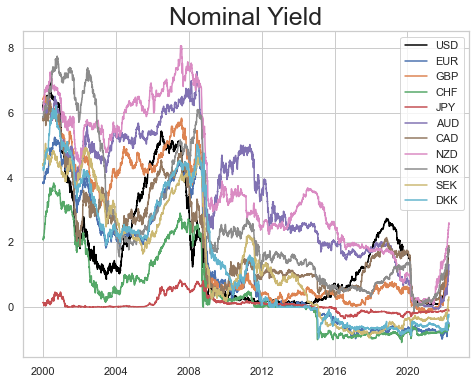

In [15]:
#Plotting Nominal Yields (Fig-1a)

plt.figure(figsize=(8,6))

for each_curr in df_Govt_Yield_1Y.iloc[:,1:]:
    if each_curr == 'USD':
        plt.plot(df_Govt_Yield_1Y['Date'], df_Govt_Yield_1Y[each_curr], label=each_curr, color='black')
    else:
        plt.plot(df_Govt_Yield_1Y['Date'], df_Govt_Yield_1Y[each_curr], label=each_curr)

plt.title("Nominal Yield", fontsize=25)
plt.legend()
plt.show()

# Computations & Analysis

### Market-implied Forward Premium (MiFP)
- For longer term maturity(>=1), we calculate as follows:

MiFP(i,n,t) = IRS(i,n,t) + BS(i,n,t) − IRS(USD,n,t)

In [16]:
# First merge the IRS and BS data based on Date

df_MiFP = df_Int_Rate_Swap_1Y.merge(df_Basis_Swaps_1Y, left_on='Date', right_on='Date', how='outer')

In [17]:
# Backfill the data assuming that today's rate will be same as yesterday's rate in case of unavailablity of data
# Then Forward fill the data assuming the yesterday's rate will same as today's rate in case of unavailable of data

df_MiFP = df_MiFP.bfill(axis='rows').ffill(axis='rows')
df_MiFP

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,...,BS_EUR,BS_GBP,BS_CHF,BS_JPY,BS_AUD,BS_CAD,BS_NZD,BS_NOK,BS_SEK,BS_DKK
0,2000-01-03,6.5200,4.01500,0.82540,0.37500,0.4460,6.360,5.035,6.4900,5.9626,...,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
1,2000-01-04,6.6200,4.03750,0.82540,0.37500,0.4460,6.400,5.035,6.4900,5.9583,...,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
2,2000-01-05,6.6200,4.04250,0.82540,0.37500,0.4460,6.380,5.035,6.5550,5.9242,...,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
3,2000-01-06,6.5900,4.03750,0.82540,0.37500,0.4460,6.360,5.035,6.5900,5.9428,...,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
4,2000-01-07,6.5900,3.99750,0.82540,0.37500,0.4460,6.385,5.035,6.5750,5.9471,...,-0.128159,0.014116,-0.144874,-0.2075,0.07500,0.07500,-0.03500,-0.02000,-0.0150,-0.33000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.0739,-0.07090,0.85475,-0.66275,0.0213,1.591,2.297,2.8958,1.9575,...,-0.090000,-0.035000,-0.072500,-0.1700,0.14500,-0.19750,-0.05000,-0.11815,-0.1650,-0.39732
5807,2022-04-06,2.0749,-0.07325,0.85475,-0.66275,0.0213,1.655,2.275,2.9200,1.9652,...,-0.090000,-0.035000,-0.072500,-0.1700,0.22625,-0.19125,-0.04282,-0.10750,-0.1600,-0.39732
5808,2022-04-07,2.0814,-0.05410,0.85475,-0.66275,0.0213,1.629,2.338,2.9681,1.9459,...,-0.090000,-0.035000,-0.072500,-0.1700,0.19750,-0.20000,-0.03823,-0.11750,-0.1725,-0.39732
5809,2022-04-08,2.1173,-0.00810,0.85475,-0.66275,0.0213,1.636,2.388,2.9748,1.9350,...,-0.090000,-0.035000,-0.072500,-0.1700,0.17375,-0.20500,-0.05250,-0.11750,-0.1725,-0.39732


In [18]:
# Now calculate MiFP based on the above formula

df_MiFP['MiFP_EUR'] = df_MiFP['IRS_EUR'] + df_MiFP['BS_EUR'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_GBP'] = df_MiFP['IRS_GBP'] + df_MiFP['BS_GBP'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_CHF'] = df_MiFP['IRS_CHF'] + df_MiFP['BS_CHF'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_JPY'] = df_MiFP['IRS_JPY'] + df_MiFP['BS_JPY'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_AUD'] = df_MiFP['IRS_AUD'] + df_MiFP['BS_AUD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_CAD'] = df_MiFP['IRS_CAD'] + df_MiFP['BS_CAD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_NZD'] = df_MiFP['IRS_NZD'] + df_MiFP['BS_NZD'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_NOK'] = df_MiFP['IRS_NOK'] + df_MiFP['BS_NOK'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_DKK'] = df_MiFP['IRS_DKK'] + df_MiFP['BS_DKK'] - df_MiFP['IRS_USD']
df_MiFP['MiFP_SEK'] = df_MiFP['IRS_SEK'] + df_MiFP['BS_SEK'] - df_MiFP['IRS_USD']

# Keeping the relevant columns

df_MiFP = df_MiFP[['Date','MiFP_EUR', 'MiFP_GBP', 'MiFP_CHF',
                   'MiFP_JPY', 'MiFP_AUD', 'MiFP_CAD',
                   'MiFP_NZD', 'MiFP_NOK', 'MiFP_DKK', 'MiFP_SEK'
                  ]]
df_MiFP

,Date,MiFP_EUR,MiFP_GBP,MiFP_CHF,MiFP_JPY,MiFP_AUD,MiFP_CAD,MiFP_NZD,MiFP_NOK,MiFP_DKK,MiFP_SEK
0,2000-01-03,-2.633159,-5.680484,-6.289874,-6.2815,-0.08500,-1.41000,-0.06500,-0.57740,-2.39500,-1.8800
1,2000-01-04,-2.710659,-5.780484,-6.389874,-6.3815,-0.14500,-1.51000,-0.16500,-0.68170,-2.51500,-2.0300
2,2000-01-05,-2.705659,-5.780484,-6.389874,-6.3815,-0.16500,-1.51000,-0.10000,-0.71580,-2.54500,-2.0400
3,2000-01-06,-2.680659,-5.750484,-6.359874,-6.3515,-0.15500,-1.48000,-0.03500,-0.66720,-2.52500,-1.9600
4,2000-01-07,-2.720659,-5.750484,-6.359874,-6.3515,-0.13000,-1.48000,-0.05000,-0.66290,-2.57500,-2.0400
...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,-2.234800,-1.254150,-2.809150,-2.2226,-0.33790,0.02560,0.77190,-0.23455,-2.23592,-1.5564
5807,2022-04-06,-2.238150,-1.255150,-2.810150,-2.2236,-0.19365,0.00885,0.80228,-0.21720,-2.23362,-1.5164
5808,2022-04-07,-2.225500,-1.261650,-2.816650,-2.2301,-0.25490,0.05660,0.84847,-0.25300,-2.21642,-1.5310
5809,2022-04-08,-2.215400,-1.297550,-2.852550,-2.2660,-0.30755,0.06570,0.80500,-0.29980,-2.22822,-1.5503


### Swap-implied Dollar Yield (SiDY)
- Intuitively, since GovtYield(i,n,t) − MiFP(i,n,t) measures the synthetic dollar borrowing cost of swapping the cash flows of foreign currency Treasury bonds into U.S. dollars.
- At 5-year tenor, it can calculated as:

    SiDY(i,n,t=5) = GovtYield(i,n,t=5) − MiFP(i,n,t=5)


- It is immediately clear that these swap-implied dollar yields track the yield on U.S. Treasuries very closely, with significantly less dispersion than currency-specific yields.

In [19]:
# First merge the Government Yield and MiFP data based on Date

df_SiDY = df_Govt_Yield_1Y.merge(df_MiFP, left_on='Date', right_on='Date', how='outer')

In [20]:
# Now calculate SiDY based on the above formula

df_SiDY['SiDY_EUR'] = df_SiDY['EUR'] - df_SiDY['MiFP_EUR']
df_SiDY['SiDY_GBP'] = df_SiDY['GBP'] - df_SiDY['MiFP_GBP']
df_SiDY['SiDY_CHF'] = df_SiDY['CHF'] - df_SiDY['MiFP_CHF']
df_SiDY['SiDY_JPY'] = df_SiDY['JPY'] - df_SiDY['MiFP_JPY']
df_SiDY['SiDY_AUD'] = df_SiDY['AUD'] - df_SiDY['MiFP_AUD']
df_SiDY['SiDY_CAD'] = df_SiDY['CAD'] - df_SiDY['MiFP_CAD']
df_SiDY['SiDY_NZD'] = df_SiDY['NZD'] - df_SiDY['MiFP_NZD']
df_SiDY['SiDY_NOK'] = df_SiDY['NOK'] - df_SiDY['MiFP_NOK']
df_SiDY['SiDY_DKK'] = df_SiDY['DKK'] - df_SiDY['MiFP_DKK']
df_SiDY['SiDY_SEK'] = df_SiDY['SEK'] - df_SiDY['MiFP_SEK']

# Keeping the relevant columns

df_SiDY = df_SiDY[['Date','USD', 'SiDY_EUR', 'SiDY_GBP', 'SiDY_CHF',
                   'SiDY_JPY', 'SiDY_AUD', 'SiDY_CAD',
                   'SiDY_NZD', 'SiDY_NOK', 'SiDY_DKK', 'SiDY_SEK'
                  ]]
df_SiDY.dropna(axis='rows',inplace=True)
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-03,6.2300,6.453159,12.090484,8.369874,6.4315,6.20500,7.23000,6.11500,6.42740,6.71500,6.2600
1,2000-01-04,6.1400,6.570659,12.190484,8.469874,6.5315,6.26500,7.33000,6.21500,6.56170,6.82500,6.4400
2,2000-01-05,6.2200,6.575659,12.210484,8.469874,6.5215,6.25500,7.34000,6.15000,6.56580,6.84500,6.4400
3,2000-01-06,6.1800,6.540659,12.180484,8.469874,6.4815,6.26500,7.22000,6.15500,6.52720,6.80500,6.3900
4,2000-01-07,6.2300,6.540659,12.160484,8.449874,6.4915,6.25000,7.26000,6.21000,6.52290,6.81500,6.4700
...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,1.7324,1.736700,2.366350,2.238450,2.1408,1.46310,1.79160,1.67960,2.04285,1.95322,1.7942
5807,2022-04-06,1.7562,1.704450,2.373650,2.233450,2.1430,1.48245,1.80875,1.77082,2.06440,1.95342,1.7913
5808,2022-04-07,1.7337,1.735600,2.374250,2.262450,2.1430,1.54910,1.76990,1.66703,2.10210,1.95552,1.8282
5809,2022-04-08,1.7773,1.739400,2.411750,2.308950,2.1544,1.62305,1.83330,1.74610,2.14290,2.01062,1.8689


In [21]:
# Taking seven-day moving averages

df_SiDY = df_SiDY.set_index('Date').dropna().rolling(7).mean().dropna().reset_index()
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-11,6.227143,6.542802,12.169055,8.467017,6.491500,6.232143,7.282857,6.166429,6.531386,6.793571,6.411429
1,2000-01-12,6.242857,6.566016,12.197627,8.498445,6.508643,6.243571,7.304286,6.182857,6.560857,6.809286,6.442857
2,2000-01-13,6.270000,6.576730,12.211913,8.511303,6.512929,6.260000,7.315714,6.200000,6.573286,6.813571,6.451429
3,2000-01-14,6.282857,6.580659,12.219055,8.521303,6.514357,6.268571,7.321429,6.217857,6.583514,6.815000,6.462857
4,2000-01-17,6.304286,6.594230,12.234770,8.532731,6.522929,6.279286,7.344286,6.238571,6.600014,6.819286,6.488571
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,1.662000,1.646171,2.191464,2.138364,2.066257,1.460807,1.710400,1.609486,1.852921,1.885063,1.694100
5801,2022-04-06,1.679186,1.655657,2.221664,2.154921,2.075414,1.464971,1.720536,1.632703,1.898864,1.893249,1.708871
5802,2022-04-07,1.693943,1.666907,2.252336,2.172464,2.086829,1.478643,1.733407,1.641236,1.947007,1.900906,1.730043
5803,2022-04-08,1.718500,1.687057,2.295450,2.200107,2.108514,1.511357,1.760664,1.673121,2.005121,1.924277,1.764057


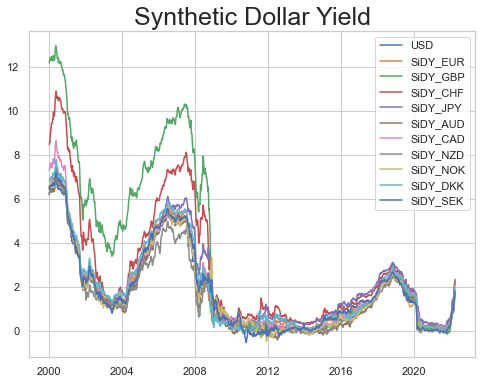

In [22]:
#Plotting Synthetic Dollar Yields (Fig-1b)

plt.figure(figsize=(8,6))

for each_curr in df_SiDY.iloc[:,1:]:
    plt.plot(df_SiDY['Date'], df_SiDY[each_curr], label=each_curr)

plt.title("Synthetic Dollar Yield", fontsize=25)
plt.legend()
plt.show()

### Average US Treasury Premium

- U.S. Treasury Premium, **Avg_US_Treasury_Prem(i,n,t)**, measures the difference in borrowing costs between foreign governments and the U.S. Treasury.
- Assumptions:
    - Government Bonds are default-free
    - FX swap markets are frictionless
    - Synthetic dollar yields of foreign Treasuries can be higher than the US Treasury yield if and only if the convienance yield of the US Treasury bond is higher than that of the foreign government bond

In [23]:
df_SiDY

,Date,USD,SiDY_EUR,SiDY_GBP,SiDY_CHF,SiDY_JPY,SiDY_AUD,SiDY_CAD,SiDY_NZD,SiDY_NOK,SiDY_DKK,SiDY_SEK
0,2000-01-11,6.227143,6.542802,12.169055,8.467017,6.491500,6.232143,7.282857,6.166429,6.531386,6.793571,6.411429
1,2000-01-12,6.242857,6.566016,12.197627,8.498445,6.508643,6.243571,7.304286,6.182857,6.560857,6.809286,6.442857
2,2000-01-13,6.270000,6.576730,12.211913,8.511303,6.512929,6.260000,7.315714,6.200000,6.573286,6.813571,6.451429
3,2000-01-14,6.282857,6.580659,12.219055,8.521303,6.514357,6.268571,7.321429,6.217857,6.583514,6.815000,6.462857
4,2000-01-17,6.304286,6.594230,12.234770,8.532731,6.522929,6.279286,7.344286,6.238571,6.600014,6.819286,6.488571
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,1.662000,1.646171,2.191464,2.138364,2.066257,1.460807,1.710400,1.609486,1.852921,1.885063,1.694100
5801,2022-04-06,1.679186,1.655657,2.221664,2.154921,2.075414,1.464971,1.720536,1.632703,1.898864,1.893249,1.708871
5802,2022-04-07,1.693943,1.666907,2.252336,2.172464,2.086829,1.478643,1.733407,1.641236,1.947007,1.900906,1.730043
5803,2022-04-08,1.718500,1.687057,2.295450,2.200107,2.108514,1.511357,1.760664,1.673121,2.005121,1.924277,1.764057


In [24]:
Avg_US_Treasury_Prem = df_SiDY.copy()

Avg_US_Treasury_Prem['AUD'] = Avg_US_Treasury_Prem['SiDY_AUD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['CAD'] = Avg_US_Treasury_Prem['SiDY_CAD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['CHF'] = Avg_US_Treasury_Prem['SiDY_CHF'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['DKK'] = Avg_US_Treasury_Prem['SiDY_DKK'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['EUR'] = Avg_US_Treasury_Prem['SiDY_EUR'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['GBP'] = Avg_US_Treasury_Prem['SiDY_GBP'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['JPY'] = Avg_US_Treasury_Prem['SiDY_JPY'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['NOK'] = Avg_US_Treasury_Prem['SiDY_NOK'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['NZD'] = Avg_US_Treasury_Prem['SiDY_NZD'] - Avg_US_Treasury_Prem['USD']
Avg_US_Treasury_Prem['SEK'] = Avg_US_Treasury_Prem['SiDY_SEK'] - Avg_US_Treasury_Prem['USD']

#Keep the relevant columns

Avg_US_Treasury_Prem = Avg_US_Treasury_Prem[['Date', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK']]
Avg_US_Treasury_Prem

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,SEK
0,2000-01-11,0.005000,1.055714,2.239874,0.566429,0.315659,5.941913,0.264357,0.304243,-0.060714,0.184286
1,2000-01-12,0.000714,1.061429,2.255588,0.566429,0.323159,5.954770,0.265786,0.318000,-0.060000,0.200000
2,2000-01-13,-0.010000,1.045714,2.241303,0.543571,0.306730,5.941913,0.242929,0.303286,-0.070000,0.181429
3,2000-01-14,-0.014286,1.038571,2.238445,0.532143,0.297802,5.936198,0.231500,0.300657,-0.065000,0.180000
4,2000-01-17,-0.025000,1.040000,2.228445,0.515000,0.289945,5.930484,0.218643,0.295729,-0.065714,0.184286
...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,-0.201193,0.048400,0.476364,0.223063,-0.015829,0.529464,0.404257,0.190921,-0.052514,0.032100
5801,2022-04-06,-0.214214,0.041350,0.475736,0.214063,-0.023529,0.542479,0.396229,0.219679,-0.046483,0.029686
5802,2022-04-07,-0.215300,0.039464,0.478521,0.206963,-0.027036,0.558393,0.392886,0.253064,-0.052707,0.036100
5803,2022-04-08,-0.207143,0.042164,0.481607,0.205777,-0.031443,0.576950,0.390014,0.286621,-0.045379,0.045557


In [25]:
Avg_US_Treasury_Prem['Mean_1Y_US_Treasury_Prem'] = Avg_US_Treasury_Prem.set_index('Date').mean(axis=1).reset_index()[0]
Avg_US_Treasury_Prem

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,SEK,Mean_1Y_US_Treasury_Prem
0,2000-01-11,0.005000,1.055714,2.239874,0.566429,0.315659,5.941913,0.264357,0.304243,-0.060714,0.184286,1.081676
1,2000-01-12,0.000714,1.061429,2.255588,0.566429,0.323159,5.954770,0.265786,0.318000,-0.060000,0.200000,1.088587
2,2000-01-13,-0.010000,1.045714,2.241303,0.543571,0.306730,5.941913,0.242929,0.303286,-0.070000,0.181429,1.072687
3,2000-01-14,-0.014286,1.038571,2.238445,0.532143,0.297802,5.936198,0.231500,0.300657,-0.065000,0.180000,1.067603
4,2000-01-17,-0.025000,1.040000,2.228445,0.515000,0.289945,5.930484,0.218643,0.295729,-0.065714,0.184286,1.061182
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,2022-04-05,-0.201193,0.048400,0.476364,0.223063,-0.015829,0.529464,0.404257,0.190921,-0.052514,0.032100,0.163503
5801,2022-04-06,-0.214214,0.041350,0.475736,0.214063,-0.023529,0.542479,0.396229,0.219679,-0.046483,0.029686,0.163499
5802,2022-04-07,-0.215300,0.039464,0.478521,0.206963,-0.027036,0.558393,0.392886,0.253064,-0.052707,0.036100,0.167035
5803,2022-04-08,-0.207143,0.042164,0.481607,0.205777,-0.031443,0.576950,0.390014,0.286621,-0.045379,0.045557,0.174473


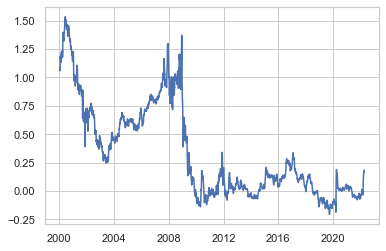

In [26]:
plt.plot(Avg_US_Treasury_Prem['Date'], Avg_US_Treasury_Prem['Mean_1Y_US_Treasury_Prem'])

#### Computations for two adjusted versions of the U.S. Treasury Premium:
1. Premium adjusted for Swap market frictions
    - (a.k.a.) Premium, adj. LIBOR CIP dev.
    - Tau_Libor(i,n,t) = { IRS(i,n,t) - IRS(USD,n,t) } - MiFP(i,n,t)
    - In benchmark calculation, we use the Libor interest rate swap as our risk-free rate proxy.
2. Premium adjusted for both Swap market frictions and the credit differential between foreign and US Treasuries
    - (a.k.a.) Premium, adj. LIBOR CIP dev & CDS

##### 1. Premium, adj. LIBOR CIP dev.

   _**Equation-1:**_ Tau_Libor(i,n,t) = { IRS(i,n,t) - IRS(USD,n,t) } - MiFP(i,n,t)

   _**Equation-2:**_ Adjusted_Swap_Avg_US_Treasury_Prem(i,n,t) = Avg_US_Treasury_Prem(i,n,t) - Tau_Libor(i,n,t)

In [27]:
# First merge the IRS and MiFP datasets

df_Adjusted_Swap_Avg_US_Treasury_Prem = df_Int_Rate_Swap_1Y.merge(df_MiFP, left_on='Date', right_on='Date', how='outer')
df_Adjusted_Swap_Avg_US_Treasury_Prem

,Date,IRS_USD,IRS_EUR,IRS_GBP,IRS_CHF,IRS_JPY,IRS_AUD,IRS_CAD,IRS_NZD,IRS_NOK,...,MiFP_EUR,MiFP_GBP,MiFP_CHF,MiFP_JPY,MiFP_AUD,MiFP_CAD,MiFP_NZD,MiFP_NOK,MiFP_DKK,MiFP_SEK
0,2000-01-03,6.5200,4.01500,0.82540,0.37500,0.4460,6.360,5.035,6.4900,5.9626,...,-2.633159,-5.680484,-6.289874,-6.2815,-0.08500,-1.41000,-0.06500,-0.57740,-2.39500,-1.8800
1,2000-01-04,6.6200,4.03750,0.82540,0.37500,0.4460,6.400,5.035,6.4900,5.9583,...,-2.710659,-5.780484,-6.389874,-6.3815,-0.14500,-1.51000,-0.16500,-0.68170,-2.51500,-2.0300
2,2000-01-05,6.6200,4.04250,0.82540,0.37500,0.4460,6.380,5.035,6.5550,5.9242,...,-2.705659,-5.780484,-6.389874,-6.3815,-0.16500,-1.51000,-0.10000,-0.71580,-2.54500,-2.0400
3,2000-01-06,6.5900,4.03750,0.82540,0.37500,0.4460,6.360,5.035,6.5900,5.9428,...,-2.680659,-5.750484,-6.359874,-6.3515,-0.15500,-1.48000,-0.03500,-0.66720,-2.52500,-1.9600
4,2000-01-07,6.5900,3.99750,0.82540,0.37500,0.4460,6.385,5.035,6.5750,5.9471,...,-2.720659,-5.750484,-6.359874,-6.3515,-0.13000,-1.48000,-0.05000,-0.66290,-2.57500,-2.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,2.0739,-0.07090,0.85475,-0.66275,0.0213,1.591,2.297,2.8958,1.9575,...,-2.234800,-1.254150,-2.809150,-2.2226,-0.33790,0.02560,0.77190,-0.23455,-2.23592,-1.5564
5807,2022-04-06,2.0749,-0.07325,0.85475,-0.66275,0.0213,1.655,2.275,2.9200,1.9652,...,-2.238150,-1.255150,-2.810150,-2.2236,-0.19365,0.00885,0.80228,-0.21720,-2.23362,-1.5164
5808,2022-04-07,2.0814,-0.05410,0.85475,-0.66275,0.0213,1.629,2.338,2.9681,1.9459,...,-2.225500,-1.261650,-2.816650,-2.2301,-0.25490,0.05660,0.84847,-0.25300,-2.21642,-1.5310
5809,2022-04-08,2.1173,-0.00810,0.85475,-0.66275,0.0213,1.636,2.388,2.9748,1.9350,...,-2.215400,-1.297550,-2.852550,-2.2660,-0.30755,0.06570,0.80500,-0.29980,-2.22822,-1.5503


In [28]:
# Calculating Tau Libor (this is equal to negative of Basis Swap Rate)

df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_EUR'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_EUR'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_EUR']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_GBP'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_GBP'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_GBP']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_CHF'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_CHF'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_CHF']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_JPY'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_JPY'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_JPY']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_AUD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_AUD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_AUD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_CAD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_CAD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_CAD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_NZD'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_NZD'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_NZD']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_NOK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_NOK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_NOK']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_DKK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_DKK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_DKK']
df_Adjusted_Swap_Avg_US_Treasury_Prem['Tau_LIBOR_SEK'] = (df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_SEK'] - df_Adjusted_Swap_Avg_US_Treasury_Prem['IRS_USD']) - df_Adjusted_Swap_Avg_US_Treasury_Prem['MiFP_SEK']

# Keeping only the relevant columns

df_Adjusted_Swap_Avg_US_Treasury_Prem = df_Adjusted_Swap_Avg_US_Treasury_Prem[['Date', 'Tau_LIBOR_EUR', 'Tau_LIBOR_GBP',
                                                                               'Tau_LIBOR_CHF', 'Tau_LIBOR_JPY',
                                                                               'Tau_LIBOR_AUD', 'Tau_LIBOR_CAD',
                                                                               'Tau_LIBOR_NZD', 'Tau_LIBOR_NOK',
                                                                               'Tau_LIBOR_DKK', 'Tau_LIBOR_SEK'
                                                                              ]]
df_Adjusted_Swap_Avg_US_Treasury_Prem

,Date,Tau_LIBOR_EUR,Tau_LIBOR_GBP,Tau_LIBOR_CHF,Tau_LIBOR_JPY,Tau_LIBOR_AUD,Tau_LIBOR_CAD,Tau_LIBOR_NZD,Tau_LIBOR_NOK,Tau_LIBOR_DKK,Tau_LIBOR_SEK
0,2000-01-03,0.128159,-0.014116,0.144874,0.2075,-0.07500,-0.07500,0.03500,0.02000,0.33000,0.0150
1,2000-01-04,0.128159,-0.014116,0.144874,0.2075,-0.07500,-0.07500,0.03500,0.02000,0.33000,0.0150
2,2000-01-05,0.128159,-0.014116,0.144874,0.2075,-0.07500,-0.07500,0.03500,0.02000,0.33000,0.0150
3,2000-01-06,0.128159,-0.014116,0.144874,0.2075,-0.07500,-0.07500,0.03500,0.02000,0.33000,0.0150
4,2000-01-07,0.128159,-0.014116,0.144874,0.2075,-0.07500,-0.07500,0.03500,0.02000,0.33000,0.0150
...,...,...,...,...,...,...,...,...,...,...,...
5806,2022-04-05,0.090000,0.035000,0.072500,0.1700,-0.14500,0.19750,0.05000,0.11815,0.39732,0.1650
5807,2022-04-06,0.090000,0.035000,0.072500,0.1700,-0.22625,0.19125,0.04282,0.10750,0.39732,0.1600
5808,2022-04-07,0.090000,0.035000,0.072500,0.1700,-0.19750,0.20000,0.03823,0.11750,0.39732,0.1725
5809,2022-04-08,0.090000,0.035000,0.072500,0.1700,-0.17375,0.20500,0.05250,0.11750,0.39732,0.1725


In [29]:
# To compute adjusted LIBOR CIP dev. Premium, we first merge the Tau Libor data with previously computed Premium data

df_US_Treasury_Premiums = Avg_US_Treasury_Prem.iloc[:,:-1].merge(df_Adjusted_Swap_Avg_US_Treasury_Prem, left_on='Date', right_on='Date', how='outer')
df_US_Treasury_Premiums

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Tau_LIBOR_EUR,Tau_LIBOR_GBP,Tau_LIBOR_CHF,Tau_LIBOR_JPY,Tau_LIBOR_AUD,Tau_LIBOR_CAD,Tau_LIBOR_NZD,Tau_LIBOR_NOK,Tau_LIBOR_DKK,Tau_LIBOR_SEK
0,2000-01-11,0.005000,1.055714,2.239874,0.566429,0.315659,5.941913,0.264357,0.304243,-0.060714,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015
1,2000-01-12,0.000714,1.061429,2.255588,0.566429,0.323159,5.954770,0.265786,0.318000,-0.060000,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015
2,2000-01-13,-0.010000,1.045714,2.241303,0.543571,0.306730,5.941913,0.242929,0.303286,-0.070000,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015
3,2000-01-14,-0.014286,1.038571,2.238445,0.532143,0.297802,5.936198,0.231500,0.300657,-0.065000,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015
4,2000-01-17,-0.025000,1.040000,2.228445,0.515000,0.289945,5.930484,0.218643,0.295729,-0.065714,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.128159,-0.014116,0.144874,0.2075,-0.075,-0.075,0.035,0.02,0.33,0.015


In [30]:
# Computing the adj. LIBOR CIP dev.

df_US_Treasury_Premiums['Adj_Tau_AUD'] = df_US_Treasury_Premiums['AUD'] - df_US_Treasury_Premiums['Tau_LIBOR_AUD']
df_US_Treasury_Premiums['Adj_Tau_CAD'] = df_US_Treasury_Premiums['CAD'] - df_US_Treasury_Premiums['Tau_LIBOR_CAD']
df_US_Treasury_Premiums['Adj_Tau_CHF'] = df_US_Treasury_Premiums['CHF'] - df_US_Treasury_Premiums['Tau_LIBOR_CHF']
df_US_Treasury_Premiums['Adj_Tau_DKK'] = df_US_Treasury_Premiums['DKK'] - df_US_Treasury_Premiums['Tau_LIBOR_DKK']
df_US_Treasury_Premiums['Adj_Tau_EUR'] = df_US_Treasury_Premiums['EUR'] - df_US_Treasury_Premiums['Tau_LIBOR_EUR']
df_US_Treasury_Premiums['Adj_Tau_GBP'] = df_US_Treasury_Premiums['GBP'] - df_US_Treasury_Premiums['Tau_LIBOR_GBP']
df_US_Treasury_Premiums['Adj_Tau_JPY'] = df_US_Treasury_Premiums['JPY'] - df_US_Treasury_Premiums['Tau_LIBOR_JPY']
df_US_Treasury_Premiums['Adj_Tau_NOK'] = df_US_Treasury_Premiums['NOK'] - df_US_Treasury_Premiums['Tau_LIBOR_NOK']
df_US_Treasury_Premiums['Adj_Tau_NZD'] = df_US_Treasury_Premiums['NZD'] - df_US_Treasury_Premiums['Tau_LIBOR_NZD']
df_US_Treasury_Premiums['Adj_Tau_SEK'] = df_US_Treasury_Premiums['SEK'] - df_US_Treasury_Premiums['Tau_LIBOR_SEK']

df_US_Treasury_Premiums = df_US_Treasury_Premiums[['Date','AUD','CAD','CHF','DKK','EUR','GBP','JPY','NOK','NZD','SEK',
                         'Adj_Tau_AUD','Adj_Tau_CAD','Adj_Tau_CHF','Adj_Tau_DKK','Adj_Tau_EUR','Adj_Tau_GBP',
                         'Adj_Tau_JPY','Adj_Tau_NOK','Adj_Tau_NZD','Adj_Tau_SEK']]
df_US_Treasury_Premiums

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_AUD,Adj_Tau_CAD,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK
0,2000-01-11,0.005000,1.055714,2.239874,0.566429,0.315659,5.941913,0.264357,0.304243,-0.060714,...,0.080000,1.130714,2.095000,0.236429,0.187500,5.956029,0.056857,0.284243,-0.095714,0.169286
1,2000-01-12,0.000714,1.061429,2.255588,0.566429,0.323159,5.954770,0.265786,0.318000,-0.060000,...,0.075714,1.136429,2.110714,0.236429,0.195000,5.968886,0.058286,0.298000,-0.095000,0.185000
2,2000-01-13,-0.010000,1.045714,2.241303,0.543571,0.306730,5.941913,0.242929,0.303286,-0.070000,...,0.065000,1.120714,2.096429,0.213571,0.178571,5.956029,0.035429,0.283286,-0.105000,0.166429
3,2000-01-14,-0.014286,1.038571,2.238445,0.532143,0.297802,5.936198,0.231500,0.300657,-0.065000,...,0.060714,1.113571,2.093571,0.202143,0.169643,5.950314,0.024000,0.280657,-0.100000,0.165000
4,2000-01-17,-0.025000,1.040000,2.228445,0.515000,0.289945,5.930484,0.218643,0.295729,-0.065714,...,0.050000,1.115000,2.083571,0.185000,0.161786,5.944600,0.011143,0.275729,-0.100714,0.169286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2. Premium, adj. LIBOR CIP dev & CDS

### Cross-Country Mean of the 5-year U.S. Treasury Premium

- Observation-1: The difference between these measures are smallest from 2000 to 2006
- Observation-2: During that time, CIP held for interbank rates and sovereign CDS spreads between U.S. and foreign countries were approximately zero. Therefore, the U.S. Treasury Premium and the adjusted versions, CIP and CIP & CDS, were all nearly equal with cross-country averages at the five-year tenor.

In [31]:
df_US_Treasury_Premiums['CC_Mean'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,:10].mean(axis=1).reset_index()[0]
df_US_Treasury_Premiums['CC_Mean_Adj_CIP'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,10:-1].mean(axis=1).reset_index()[0]
df_US_Treasury_Premiums

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_26144/405675209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['CC_Mean'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,:10].mean(axis=1).reset_index()[0]
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_26144/405675209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['CC_Mean_Adj_CIP'] = df_US_Treasury_Premiums.set_index('Date').iloc[:,10:-1].mean(axis=1).reset_index()[0]


,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK,CC_Mean,CC_Mean_Adj_CIP
0,2000-01-11,0.005000,1.055714,2.239874,0.566429,0.315659,5.941913,0.264357,0.304243,-0.060714,...,2.095000,0.236429,0.187500,5.956029,0.056857,0.284243,-0.095714,0.169286,1.081676,1.010034
1,2000-01-12,0.000714,1.061429,2.255588,0.566429,0.323159,5.954770,0.265786,0.318000,-0.060000,...,2.110714,0.236429,0.195000,5.968886,0.058286,0.298000,-0.095000,0.185000,1.088587,1.016946
2,2000-01-13,-0.010000,1.045714,2.241303,0.543571,0.306730,5.941913,0.242929,0.303286,-0.070000,...,2.096429,0.213571,0.178571,5.956029,0.035429,0.283286,-0.105000,0.166429,1.072687,1.001046
3,2000-01-14,-0.014286,1.038571,2.238445,0.532143,0.297802,5.936198,0.231500,0.300657,-0.065000,...,2.093571,0.202143,0.169643,5.950314,0.024000,0.280657,-0.100000,0.165000,1.067603,0.995961
4,2000-01-17,-0.025000,1.040000,2.228445,0.515000,0.289945,5.930484,0.218643,0.295729,-0.065714,...,2.083571,0.185000,0.161786,5.944600,0.011143,0.275729,-0.100714,0.169286,1.061182,0.989540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


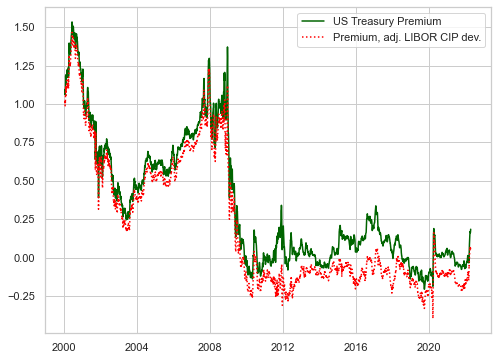

In [32]:
'''
Figure-2 of the paper - Not exactly same as we do not know how the author aggregated the different countries' Premiums into
a single value. But the observation of the author and the results our (assumed) methodology generates are approx. same.
'''

plt.figure(figsize=(8,6))
plt.plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CC_Mean'], label='US Treasury Premium', color='darkgreen')
plt.plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CC_Mean_Adj_CIP'], label='Premium, adj. LIBOR CIP dev.', linestyle=':', color='red')
plt.legend()
plt.show()

### 5-year average U.S. Treasury Premium by country

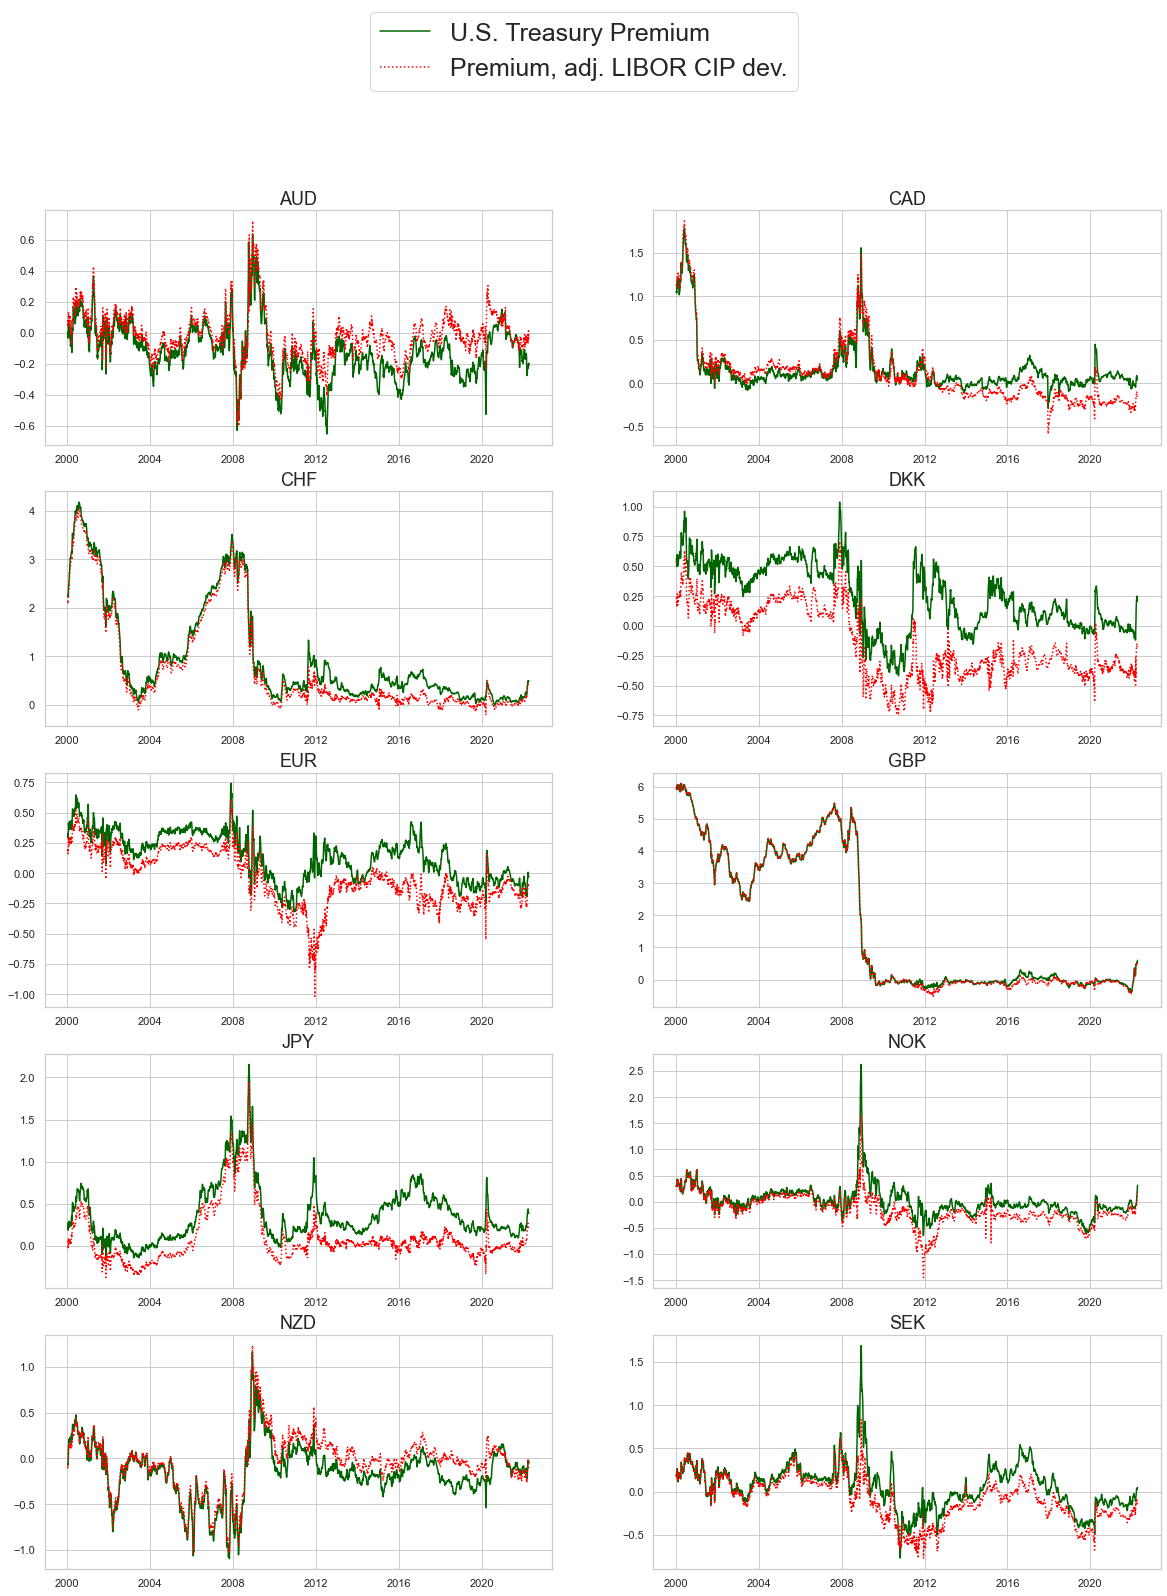

In [33]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,25))

axes[0][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['AUD'], color='darkgreen')
axes[0][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_AUD'], linestyle=':', color='red')
axes[0][0].set_title('AUD', fontsize=18)

axes[0][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CAD'], color='darkgreen')
axes[0][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_CAD'], linestyle=':', color='red')
axes[0][1].set_title('CAD', fontsize=18)

axes[1][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['CHF'], color='darkgreen')
axes[1][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_CHF'], linestyle=':', color='red')
axes[1][0].set_title('CHF', fontsize=18)

axes[1][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['DKK'], color='darkgreen')
axes[1][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_DKK'], linestyle=':', color='red')
axes[1][1].set_title('DKK', fontsize=18)

axes[2][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['EUR'], color='darkgreen')
axes[2][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_EUR'], linestyle=':', color='red')
axes[2][0].set_title('EUR', fontsize=18)

axes[2][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['GBP'], color='darkgreen')
axes[2][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_GBP'], linestyle=':', color='red')
axes[2][1].set_title('GBP', fontsize=18)

axes[3][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['JPY'], color='darkgreen')
axes[3][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_JPY'], linestyle=':', color='red')
axes[3][0].set_title('JPY', fontsize=18)

axes[3][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['NOK'], color='darkgreen')
axes[3][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_NOK'], linestyle=':', color='red')
axes[3][1].set_title('NOK', fontsize=18)

axes[4][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['NZD'], color='darkgreen')
axes[4][0].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_NZD'], linestyle=':', color='red')
axes[4][0].set_title('NZD', fontsize=18)

axes[4][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['SEK'], color='darkgreen')
axes[4][1].plot(df_US_Treasury_Premiums['Date'],df_US_Treasury_Premiums['Adj_Tau_SEK'], linestyle=':', color='red')
axes[4][1].set_title('SEK', fontsize=18)

fig.legend(['U.S. Treasury Premium', 'Premium, adj. LIBOR CIP dev.'], loc='upper center', fontsize=25)

In [34]:
from functools import reduce

df_stats_full = df_US_Treasury_Premiums.iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'Full Sample'})
df_stats_2006 = df_US_Treasury_Premiums[df_US_Treasury_Premiums['Date']<='2006-12-31'].iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'2000-2006'})
df_stats_2009 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2006-12-31') & (df_US_Treasury_Premiums['Date']<='2009-12-31')].iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'2007-2009'})
df_stats_2016 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2009-12-31') & (df_US_Treasury_Premiums['Date']<='2016-12-31')].iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'2010-2016'})
df_stats_2021 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2016-12-31') & (df_US_Treasury_Premiums['Date']<='2021-12-31')].iloc[:,1:11].agg(['mean','sem','count']).T.stack().to_frame().rename(columns={0:'2017-2021'})

dfs_ss = [df_stats_full, df_stats_2006, df_stats_2009, df_stats_2016, df_stats_2021]

df_summary_stats = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_ss)
df_summary_stats

Full Sample    2000-2006   2007-2009    2010-2016    2017-2021
AUD mean     -0.117531    -0.030149   -0.001250    -0.243830    -0.129250
    sem       0.002251     0.002692    0.008796     0.002825     0.003301
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
CAD mean      0.164474     0.269913    0.352231     0.057603     0.063015
    sem       0.003858     0.009921    0.010484     0.001953     0.002614
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
CHF mean      0.990626     1.696068    1.961184     0.444573     0.227423
    sem       0.013852     0.026922    0.039820     0.004822     0.004252
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
DKK mean      0.242624     0.521121    0.263972     0.102721     0.049945
    sem       0.003640     0.002499    0.011355     0.005691     0.002207
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
EUR mean      0.145953     0.327127    0.204224     0.063032    -0.012862
    sem       0.002531     0.002212    0.006091     0.003830     0.003071
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
GBP mean      1.666070     4.073074    3.130281    -0.074793    -0.052351
    sem       0.028292     0.020483    0.078447     0.002242     0.003263
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
JPY mean      0.373342     0.195026    0.894244     0.355143     0.340143
    sem       0.004436     0.005623    0.016322     0.004892     0.004909
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
NOK mean      0.011803     0.131751    0.257923    -0.087281    -0.161183
    sem       0.003625     0.003613    0.017441     0.003934     0.004174
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
NZD mean     -0.145352    -0.176309   -0.161166    -0.104450    -0.151166
    sem       0.003831     0.007317    0.020435     0.002946     0.003984
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000
SEK mean      0.064055     0.167773    0.295916    -0.026780    -0.086501
    sem       0.003397     0.002962    0.011267     0.006003     0.005647
    count  5805.000000  1819.000000  784.000000  1826.000000  1305.000000

In [35]:
from functools import reduce

df_stats_full = df_US_Treasury_Premiums.iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'Full Sample'})
df_stats_2006 = df_US_Treasury_Premiums[df_US_Treasury_Premiums['Date']<='2006-12-31'].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2000-2006'})
df_stats_2009 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2006-12-31') & (df_US_Treasury_Premiums['Date']<='2009-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2007-2009'})
df_stats_2016 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2009-12-31') & (df_US_Treasury_Premiums['Date']<='2016-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2010-2016'})
df_stats_2021 = df_US_Treasury_Premiums[(df_US_Treasury_Premiums['Date']>'2016-12-31') & (df_US_Treasury_Premiums['Date']<='2021-12-31')].iloc[:,1:10].agg(['mean','sem','count']).T.mean().to_frame().rename(columns={0:'2017-2021'})

dfs_ss = [df_stats_full, df_stats_2006, df_stats_2009, df_stats_2016, df_stats_2021]

df_summary_stats = reduce(lambda  left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs_ss)
df_summary_stats

,Full Sample,2000-2006,2007-2009,2010-2016,2017-2021
mean,0.370223,0.778625,0.766849,0.056969,0.019302
sem,0.007368,0.009031,0.023243,0.003682,0.003531
count,5805.000000,1819.000000,784.000000,1826.000000,1305.000000


In [36]:
#df_US_Treasury_Premiums['Avg_Premium'] = df_US_Treasury_Premiums.iloc[:,:10].mean(axis=1)
#df_US_Treasury_Premiums['Avg_Adj_Tau_Premium'] = df_US_Treasury_Premiums.iloc[:,10:10].mean(axis=1)
df_US_Treasury_Premiums.drop(columns=['CC_Mean','CC_Mean_Adj_CIP'], inplace=True)

df_US_Treasury_Premiums['Avg_Premium'] = df_US_Treasury_Premiums.iloc[:,1:11].mean(axis=1)
df_US_Treasury_Premiums['Avg_Adj_Tau_Premium'] = df_US_Treasury_Premiums.iloc[:,11:-1].mean(axis=1)
df_US_Treasury_Premiums

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_26144/907076860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US_Treasury_Premiums['Avg_Premium'] = df_US_Treasury_Premiums.iloc[:,1:11].mean(axis=1)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_26144/907076860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Date,AUD,CAD,CHF,DKK,EUR,GBP,JPY,NOK,NZD,...,Adj_Tau_CHF,Adj_Tau_DKK,Adj_Tau_EUR,Adj_Tau_GBP,Adj_Tau_JPY,Adj_Tau_NOK,Adj_Tau_NZD,Adj_Tau_SEK,Avg_Premium,Avg_Adj_Tau_Premium
0,2000-01-11,0.005000,1.055714,2.239874,0.566429,0.315659,5.941913,0.264357,0.304243,-0.060714,...,2.095000,0.236429,0.187500,5.956029,0.056857,0.284243,-0.095714,0.169286,1.081676,1.010034
1,2000-01-12,0.000714,1.061429,2.255588,0.566429,0.323159,5.954770,0.265786,0.318000,-0.060000,...,2.110714,0.236429,0.195000,5.968886,0.058286,0.298000,-0.095000,0.185000,1.088587,1.016946
2,2000-01-13,-0.010000,1.045714,2.241303,0.543571,0.306730,5.941913,0.242929,0.303286,-0.070000,...,2.096429,0.213571,0.178571,5.956029,0.035429,0.283286,-0.105000,0.166429,1.072687,1.001046
3,2000-01-14,-0.014286,1.038571,2.238445,0.532143,0.297802,5.936198,0.231500,0.300657,-0.065000,...,2.093571,0.202143,0.169643,5.950314,0.024000,0.280657,-0.100000,0.165000,1.067603,0.995961
4,2000-01-17,-0.025000,1.040000,2.228445,0.515000,0.289945,5.930484,0.218643,0.295729,-0.065714,...,2.083571,0.185000,0.161786,5.944600,0.011143,0.275729,-0.100714,0.169286,1.061182,0.989540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5808,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5809,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_Premium_Avg = df_US_Treasury_Premiums.loc[:,['Date','Avg_Premium','Avg_Adj_Tau_Premium']].set_index('Date').dropna().rolling(7).mean().dropna().reset_index()
df_Premium_Avg

,Date,Avg_Premium,Avg_Adj_Tau_Premium
0,2000-01-19,1.072546,1.000904
1,2000-01-20,1.074539,1.002897
2,2000-01-21,1.072950,1.001161
3,2000-01-24,1.078985,1.007196
4,2000-01-25,1.090693,1.018754
...,...,...,...
5794,2022-04-05,0.163810,0.059264
5795,2022-04-06,0.164965,0.058683
5796,2022-04-07,0.165236,0.056872
5797,2022-04-08,0.166090,0.056190


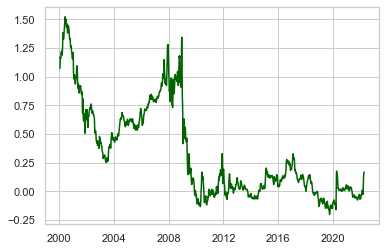

In [38]:
plt.plot(df_Premium_Avg['Date'],df_Premium_Avg['Avg_Premium'], color='darkgreen')

In [39]:
# Exporting the data from here to juxtapose against 10Y and 5Y

df_Premium_Avg.set_index('Date').to_csv('Output/Average_US_Tresury_Premium_1Y.csv')